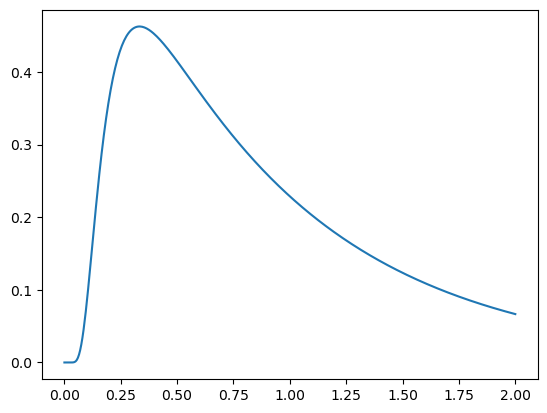

In [103]:
import matplotlib.pyplot as plt
from pyddm import Model
m = Model()
s = m.solve()
plt.plot(s.t_domain, s.pdf("correct"))
# plt.savefig("helloworld.png")
plt.show()

In [104]:
from pyddm import Model
from pyddm.models import DriftConstant, NoiseConstant, BoundConstant, OverlayNonDecision, ICPointSourceCenter
from pyddm.functions import fit_adjust_model, display_model

model = Model(name='Simple model',
              drift=DriftConstant(drift=2.2),
              noise=NoiseConstant(noise=1.5),
              bound=BoundConstant(B=1.1),
              overlay=OverlayNonDecision(nondectime=.1),
              dx=.001, dt=.01, T_dur=2)
display_model(model)
sol = model.solve()

Model Simple model information:
Choices: 'correct' (upper boundary), 'error' (lower boundary)
Drift component DriftConstant:
    constant
    Fixed parameters:
    - drift: 2.200000
Noise component NoiseConstant:
    constant
    Fixed parameters:
    - noise: 1.500000
Bound component BoundConstant:
    constant
    Fixed parameters:
    - B: 1.100000
IC component ICPointSourceCenter:
    point_source_center
    (No parameters)
Overlay component OverlayNonDecision:
    Add a non-decision by shifting the histogram
    Fixed parameters:
    - nondectime: 0.100000



In [105]:
# generate sudo-data
samp = sol.resample(1000)

In [106]:
from pyddm import Fittable, Fitted
from pyddm.models import LossRobustBIC
from pyddm.functions import fit_adjust_model
model_fit = Model(name='Simple model (fitted)',
                  drift=DriftConstant(drift=Fittable(minval=-1, maxval=4)),
                  noise=NoiseConstant(noise=Fittable(minval=0.1, maxval=4)),
                  bound=BoundConstant(B=Fittable(minval=0.1, maxval=4)),
                  overlay=OverlayNonDecision(nondectime=Fittable(minval=0, maxval=1)),
                  dx=.001, dt=.01, T_dur=2)

fit_adjust_model(samp, model_fit,
                 fitting_method="differential_evolution",
                 lossfunction=LossRobustBIC, verbose=False)

Info: Params [3.81436507 2.49905134 1.80553014 0.11465661] gave 384.6794516476742


Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(3.8143650654507204, minval=-1, maxval=4)), noise=NoiseConstant(noise=Fitted(2.4990513363494156, minval=0.1, maxval=4)), bound=BoundConstant(B=Fitted(1.805530142340106, minval=0.1, maxval=4)), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=Fitted(0.11465661123196719, minval=0, maxval=1)), dx=0.001, dt=0.01, T_dur=2, fitresult=FitResult(fitting_method='differential_evolution', method='auto', loss='BIC', value=384.6794516476742, nparams=4, samplesize=1000, mess=''))

In [107]:
display_model(model_fit)

Model Simple model (fitted) information:
Choices: 'correct' (upper boundary), 'error' (lower boundary)
Drift component DriftConstant:
    constant
    Fitted parameters:
    - drift: 3.814365
Noise component NoiseConstant:
    constant
    Fitted parameters:
    - noise: 2.499051
Bound component BoundConstant:
    constant
    Fitted parameters:
    - B: 1.805530
IC component ICPointSourceCenter:
    point_source_center
    (No parameters)
Overlay component OverlayNonDecision:
    Add a non-decision by shifting the histogram
    Fitted parameters:
    - nondectime: 0.114657
Fit information:
    Loss function: BIC
    Loss function value: 384.6794516476742
    Fitting method: differential_evolution
    Solver: auto
    Other properties:
        - nparams: 4
        - samplesize: 1000
        - mess: ''



In [108]:
model_fit.parameters()

{'drift': {'drift': Fitted(3.8143650654507204, minval=-1, maxval=4)},
 'noise': {'noise': Fitted(2.4990513363494156, minval=0.1, maxval=4)},
 'bound': {'B': Fitted(1.805530142340106, minval=0.1, maxval=4)},
 'IC': {},
 'overlay': {'nondectime': Fitted(0.11465661123196719, minval=0, maxval=1)}}

In [109]:
model_fit.get_fit_result().value()

384.6794516476742

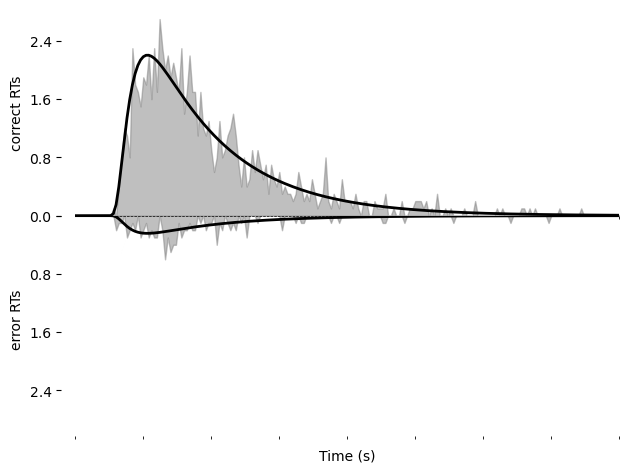

In [110]:
import pyddm.plot
import matplotlib.pyplot as plt
pyddm.plot.plot_fit_diagnostics(model=model_fit, sample=samp)
plt.savefig("simple-fit.png")
plt.show()

In [111]:
print(sol.prob("correct"))
print(sol.pdf("error"))

0.8937015385162347
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.07365499e-10
 5.00458955e-05 2.38145936e-03 1.43848498e-02 3.90619605e-02
 7.20389916e-02 1.07279501e-01 1.40406765e-01 1.69113545e-01
 1.92585355e-01 2.10874478e-01 2.24459235e-01 2.33980790e-01
 2.40101611e-01 2.43437087e-01 2.44527962e-01 2.43834117e-01
 2.41738697e-01 2.38556580e-01 2.34544091e-01 2.29908443e-01
 2.24816229e-01 2.19400774e-01 2.13768322e-01 2.08003174e-01
 2.02171914e-01 1.96326847e-01 1.90508801e-01 1.84749393e-01
 1.79072854e-01 1.73497511e-01 1.68036971e-01 1.62701084e-01
 1.57496705e-01 1.52428321e-01 1.47498541e-01 1.42708501e-01
 1.38058181e-01 1.33546658e-01 1.29172320e-01 1.24933024e-01
 1.20826228e-01 1.16849097e-01 1.12998587e-01 1.09271511e-01
 1.05664589e-01 1.02174491e-01 9.87978738e-02 9.55313982e-02
 9.23717551e-02 8.93156782e-02 8.63599563e-02 8.35014413e-02
 8.07

In [112]:
pyddm.plot.model_gui(model=model_fit, sample=samp)

Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(3.83, minval=-1, maxval=4)), noise=NoiseConstant(noise=Fitted(2.5, minval=0.1, maxval=4)), bound=BoundConstant(B=Fitted(1.8, minval=0.1, maxval=4)), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=Fitted(0.11465661123196719, minval=0, maxval=1)), dx=0.001, dt=0.01, T_dur=2, fitresult=FitResult(fitting_method='differential_evolution', method='auto', loss='BIC', value=384.6794516476742, nparams=4, samplesize=1000, mess=''))